In [7]:
import pandas as pd
import numpy as np
%load_ext autoreload
%autoreload 2
import utility_01
from utility_01 import *
from sklearn.metrics import roc_curve ,roc_auc_score ,precision_recall_curve,auc
from warnings import filterwarnings
filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
options = {"compact": True, "bg": "#09a3d5",
           "color": "white", "font": "Source Sans Pro","collapse_phrases":False}

In [9]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('max_colwidth', 260)


# Read the Data

In [10]:
df=pd.read_json('../data/dfObsV01A01.json');
df=df.sort_index();


In [11]:
df.head()

,sents,chapter,aso,entities,fner,label
0,Chapter 1,1,{'act': 'Chapter'},[],"[0, 0, 0]",0
1,"On the distinction between the first motion and the second or proper motions; and in the proper motions, between the first and the second inequality.",1,{'act': 'On'},[],"[0, 0, 0]",0
2,The testimony of the ages confirms that the motions of the planets are orbicular.,1,"{'act': 'confirms', 'subject': 'testimony'}",[],"[0, 0, 0]",0
3,"Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles.",1,"{'act': 'presumes', 'subject': 'reason', 'obj': 'this: that their gyrations are perfect circles'}",[],"[0, 0, 0]",0
4,"For among figures it is circles, and among bodies the heavens, that are considered the most perfect.",1,{'act': 'considered'},[],"[0, 0, 0]",0


In [12]:
df.tail()

,sents,chapter,aso,entities,fner,label
6694,"To find the position of Mars at opposition, Kepler computed the angular distance that Mars and Earth—now substituting the place of the Sun—moved during 17 hours 20 minutes; Mars moved eastward about 16' 20"" and the Sun westward about 42' 18"".",appendix b,"{'act': 'moved', 'subject': 'mars'}","[[Mars, PLAN], [opposition, ASTR], [Mars, PLAN], [Earth, PLAN], [Sun, PLAN], [17 hours 20 minutes, TIME], [Mars, PLAN], [eastward, ASTR], [16' 20"", LONG], [Sun, PLAN], [42' 18"", LONG]]","[0, 1, 1]",1
6695,"Accordingly, Kepler determined the longitude of Mars at opposition to be 198° 37' 50"" from which he subtracted about 39"" in order to correct Mars's orbit; he got 198° 37' 10"" (18° 37' 10"" Libra).",appendix b,"{'act': 'got', 'subject': 'he', 'obj': '' 10'}","[[longitude, ASTR], [Mars, PLAN], [opposition, ASTR], [198° 37' 50"", LONG], [Mars, PLAN], [orbit, ASTR], [198° 37' 10"", LONG], [18° 37' 10"" Libra, LONG]]","[0, 0, 1]",1
6696,The Sun moved westward and its longitude decreased from the time of observation to its position opposite to Mars.,appendix b,"{'act': 'moved', 'subject': 'sun'}","[[Sun, PLAN], [longitude, ASTR], [observation, ASTR], [Mars, PLAN]]","[0, 0, 0]",0
6697,"Therefore, the time of opposition is 17 hours 20 minutes before March 29, at 21:43, the time when the observation was made.",appendix b,"{'act': 'is', 'subject': 'time'}","[[opposition, ASTR], [17 hours 20 minutes, TIME], [March 29, DATE], [observation, ASTR]]","[1, 1, 0]",1
6698,"Kepler determined the time of opposition on March 28, 4h 23m AM, old style.",appendix b,"{'act': 'determined', 'subject': 'kepler', 'obj': 'the time of opposition on March 28'}","[[opposition, ASTR], [March 28, DATE], [4h 23m, TIME]]","[1, 1, 0]",1


In [13]:
X = list(df["sents"])

In [14]:
y = np.array(list(df["label"]))

# Distribution of Samples 

In [15]:
from collections import Counter
category=Counter(y)
count=dict(category)

In [16]:
count

{0: 5508, 1: 1191}

Text(0.5, 1.0, 'Distribution of samples over different classes')

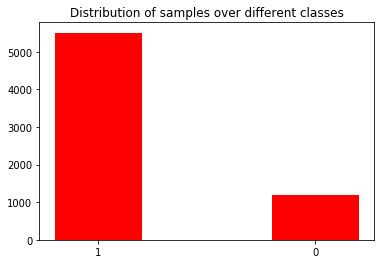

In [17]:
plt.bar(list(count.keys()),count.values(),color="r",width=.4,tick_label=["1","0"])
plt.title("Distribution of samples over different classes")


In [18]:
from sklearn.feature_extraction.text import CountVectorizer,HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.linear_model import SGDClassifier, LogisticRegression,LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC,LinearSVC
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
#from xgboost import XGBClassifier

## Models

In [19]:
#-Random Forest Classifier
trial= Pipeline([('vect', CountVectorizer(stop_words='english')),
                     ('clf', RandomForestClassifier(n_estimators=1000, random_state=0 ))])
####################################################
## 01-Random Forest Classifier with weights
class_weight = dict({0:.0069, 1:700000})
trial_01= Pipeline([('vect', CountVectorizer(stop_words='english')),
                     ('clf', RandomForestClassifier(n_estimators=1000, random_state=0 ,class_weight=class_weight))])
vec=TfidfVectorizer()
clf= SGDClassifier()
trial_05=Pipeline([("vect",vec),("clf",clf)])
#####################################################
## 02-XGBClassifier
#trial_02 = Pipeline([('vect', CountVectorizer(stop_words='english')),
                     #('clf', XGBClassifier())])


In [20]:
X=list(df["sents"])
y=np.array(list(df["label"]))

In [21]:
type(df["entities"][0])

list

In [22]:
X,y = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
X,y, test_size=0.25, random_state=42)  

## 1- Random Forest 

In [23]:
trial.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        ...ators=1000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False))])

In [24]:
y_pred=trial.predict(X_test)

In [25]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
cr=classification_report(y_test,y_pred)
print(cr)
#Color_Confusion_Matrix(y, y_test, y_pred)


[[1369   18]
 [ 106  182]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1387
           1       0.91      0.63      0.75       288

   micro avg       0.93      0.93      0.93      1675
   macro avg       0.92      0.81      0.85      1675
weighted avg       0.93      0.93      0.92      1675



In [26]:
cross_validation_accuracy(trial,X,y,cv=10)

[0.91505216 0.92089552 0.92835821 0.92835821 0.9238806  0.91044776
 0.90746269 0.9238806  0.93721973 0.91479821]
Accuracy of : 0.921 ± 0.017


In [27]:
y_pred = cross_val_predict(trial, X, y, cv=10)
cr=classification_report(y,y_pred)
print(cr)
cm = confusion_matrix(y_pred,y)
print(cm)
#Color_Confusion_Matrix(y=y,y_test=y,y_pred=y_pred)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      5508
           1       0.89      0.63      0.74      1191

   micro avg       0.92      0.92      0.92      6699
   macro avg       0.91      0.81      0.85      6699
weighted avg       0.92      0.92      0.92      6699

[[5418  439]
 [  90  752]]


In [28]:
precision, recall, thresholds = precision_recall_curve(y,y_pred)  
auc_score = auc(recall, precision)


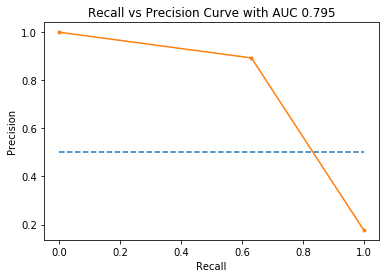

AUC: 0.795


In [29]:
plot_pr(recall, precision)

## 1-SGD

In [30]:
trial_05.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [31]:
y_pred=trial_05.predict(X_test)

In [32]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
cr=classification_report(y_test,y_pred)
print(cr)
#Color_Confusion_Matrix(y, y_test, y_pred)


[[1356   31]
 [  67  221]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1387
           1       0.88      0.77      0.82       288

   micro avg       0.94      0.94      0.94      1675
   macro avg       0.91      0.87      0.89      1675
weighted avg       0.94      0.94      0.94      1675



In [33]:
cross_validation_accuracy(trial_05,X,y,cv=10)

[0.93889717 0.94328358 0.94179104 0.9358209  0.95373134 0.92985075
 0.94328358 0.93731343 0.95964126 0.92077728]
Accuracy of : 0.940 ± 0.021


In [34]:
y_pred = cross_val_predict(trial_05, X, y, cv=10)

cr=classification_report(y,y_pred)
print(cr)
cm = confusion_matrix(y_pred,y)
#Color_Confusion_Matrix(y=y,y_test=y,y_pred=y_pred)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      5508
           1       0.87      0.78      0.82      1191

   micro avg       0.94      0.94      0.94      6699
   macro avg       0.91      0.88      0.89      6699
weighted avg       0.94      0.94      0.94      6699



In [35]:
print(cm)

[[5363  258]
 [ 145  933]]


In [36]:
precision, recall, thresholds = precision_recall_curve(y,y_pred)  
auc_score = auc(recall, precision)


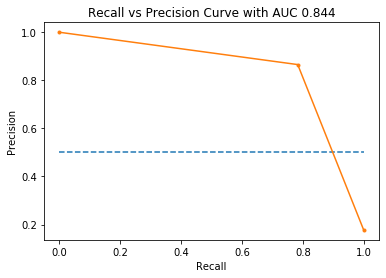

AUC: 0.844


In [37]:
plot_pr(recall, precision)

In [38]:
from eli5 import show_weights
show_weights(trial_05, top=30)

Weight?,Feature
+4.084,29
+3.863,5½
+3.612,28
+3.572,50
+3.523,24
+3.444,30
+3.428,hours
+3.385,37
+3.282,21
+3.122,scorpio


In [39]:
index_0=list(np.where(y==0))
index_1=list(np.where(y==1))
idx_0=index_0[0].tolist();
idx_1=index_1[0].tolist();

In [40]:
import eli5
eli5.show_prediction(clf, X[idx_1[5]],vec=vec)

In [41]:
eli5.show_prediction(clf, X[idx_1[7]],vec=vec)

In [42]:
eli5.show_prediction(clf, X[idx_0[0]],vec=vec)

In [43]:
eli5.show_prediction(clf, X[idx_0[1]],vec=vec)

# Parameter tununed SGD

In [44]:
param_grid_01= {
    'clf__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e-1, 1e2, 1e3], # learning rate
    'clf__max_iter': [1000], # number of epochs
    'clf__penalty': ['l2'],
    'clf__loss': ['hinge','log'],
    'clf__n_jobs': [-1],
     'clf__tol': [1e-4, 1e-3, 1e-2]
}
trial_05_01 = GridSearchCV(trial_05, param_grid=param_grid_01, cv=5, n_jobs=-1, verbose=2)

In [45]:
trial_05_01.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   13.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'clf__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 0.1, 100.0, 1000.0], 'clf__max_iter': [1000], 'clf__penalty': ['l2'], 'clf__loss': ['hinge', 'log'], 'clf__n_jobs': [-1], 'clf__tol': [0.0001, 0.001, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [46]:
y_pred=trial_05_01.predict(X_test)

In [47]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
cr=classification_report(y_test,y_pred)
print(cr)
#Color_Confusion_Matrix(y, y_test, y_pred)

[[1349   38]
 [  63  225]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1387
           1       0.86      0.78      0.82       288

   micro avg       0.94      0.94      0.94      1675
   macro avg       0.91      0.88      0.89      1675
weighted avg       0.94      0.94      0.94      1675



In [48]:
cross_validation_accuracy(trial_05_01,X,y,cv=10)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   13.5s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   13.4s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   13.7s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   13.7s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   13.4s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   13.3s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   13.3s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   13.4s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   13.3s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   13.6s finished


[0.93889717 0.94328358 0.93880597 0.94477612 0.95223881 0.92537313
 0.94029851 0.94328358 0.95515695 0.92077728]
Accuracy of : 0.940 ± 0.020


In [49]:
y_pred = cross_val_predict(trial_05_01, X, y, cv=10)

cr=classification_report(y,y_pred)
print(cr)
cm = confusion_matrix(y_pred,y)
#Color_Confusion_Matrix(y=y,y_test=y,y_pred=y_pred)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   13.5s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   13.5s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   13.5s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   13.1s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   13.2s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   13.4s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   13.7s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   13.7s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   14.0s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   13.9s finished


              precision    recall  f1-score   support

           0       0.96      0.97      0.96      5508
           1       0.86      0.79      0.82      1191

   micro avg       0.94      0.94      0.94      6699
   macro avg       0.91      0.88      0.89      6699
weighted avg       0.94      0.94      0.94      6699



In [50]:
print(cm)

[[5356  249]
 [ 152  942]]


# Using fner features with SVM 

In [51]:
X=list(df["fner"])
y=np.array(list(df["label"]))

In [52]:
X=np.array(X)

In [53]:
X,y = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
X,y, test_size=0.25, random_state=42)  

In [54]:
from sklearn import svm
SVM=svm.SVC()
SVM.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [55]:
len(X_train)

5024

In [56]:
y_pred=SVM.predict(X_test)

In [57]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
cr=classification_report(y_test,y_pred)
print(cr)
#Color_Confusion_Matrix(y, y_test, y_pred)


[[1387    0]
 [   0  288]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1387
           1       1.00      1.00      1.00       288

   micro avg       1.00      1.00      1.00      1675
   macro avg       1.00      1.00      1.00      1675
weighted avg       1.00      1.00      1.00      1675



In [58]:
cross_validation_accuracy(SVM,X,y,cv=10)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy of : 1.000 ± 0.000


In [59]:
y_pred = cross_val_predict(SVM, X, y, cv=10)

cr=classification_report(y,y_pred)
print(cr)
cm = confusion_matrix(y_pred,y)
#Color_Confusion_Matrix(y=y,y_test=y,y_pred=y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5508
           1       1.00      1.00      1.00      1191

   micro avg       1.00      1.00      1.00      6699
   macro avg       1.00      1.00      1.00      6699
weighted avg       1.00      1.00      1.00      6699

